### Project Goal and Steps

In this project, I analyze data from Instacart, a grocery delivery service. The main goal is to clean the data and explore customer shopping behavior. I focus on when people place orders, which products are most popular, how many items they usually buy, and how often they reorder the same items.

**Project Steps:**

1. Review the structure of the data and understand what each table contains.
2. Clean the data — check and fix missing values, duplicates, and incorrect data types.
3. Answer key questions about customer behavior using groupby, value_counts, and visualization tools.
4. Create clear and informative charts to support the analysis.
5. Summarize insights after each part to better understand patterns in the data.

This project helps to practice basic data analysis skills using Python and Pandas on a real dataset.

In [9]:
# Importing libraries for data analysis and visualization: pandas for working with data tables 
# numpy for numerical operations
# matplotlib for creating visualizations

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Importing the Instacart orders dataset with correct headers and separator.

orders = pd.read_csv('instacart_orders.csv',
                     sep=';'
                    )

# Display general info and first rows of the dataset

orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


#### Observation
The `days_since_prior_order` column contains missing values (450,148 non-null out of 478,967 rows). These missing values will be handled during the data preprocessing stage.

The current data types appear to be appropriate:

`order_id`, `user_id`, `order_number`, `order_dow`, and `order_hour_of_day` are stored as integers, which is suitable for these columns.

`days_since_prior_order` is stored as a float, which is expected due to the presence of missing (NaN) values.

**Note:** After addressing the missing values, I may consider converting `days_since_prior_order` to an integer type if this is appropriate for the data.

In [11]:
# Importing the products dataset with correct headers and separator.

products = pd.read_csv('products.csv',
                     sep=';'
                    )

# Display general info and first rows of the dataset

products.info()
products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


#### Observation

The `product_name` column contains missing values (48,436 non-null out of 49,694 rows). This will be handled later during the data preprocessing step.

The data types look appropriate for now:

- `product_id`, `aisle_id`, and `department_id` are integers, which is correct.
- `product_name` is an object type, which is appropriate for text data.

In [12]:
# Importing the order_products dataset with correct headers and separator.

order_products = pd.read_csv('order_products.csv',
                     sep=';'
                    )

# Display general info and first rows of the dataset

order_products.info()
order_products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


#### Observation:

- The `add_to_cart_order` column is currently `float64`, most likely due to missing values. This will be addressed later during data preprocessing.
- Other columns have appropriate data types.

In [13]:
# Importing the aisles dataset with correct headers and separator.

aisles = pd.read_csv('aisles.csv',
                     sep=';'
                    )

# Display general info and first rows of the dataset

aisles.info()
aisles.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


#### Observation:

Everything looks good with this dataset: 

- No missing values.
- Data types are correct.

No further actions needed.

In [14]:
# Importing the departments dataset with correct headers and separator.

departments = pd.read_csv('departments.csv',
                     sep=';'
                    )

# Display general info and first rows of the dataset

departments.info()
departments.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


#### Observation:

Everything looks good with this dataset: 

- No missing values.
- Data types are correct.

No further actions needed.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__


Great. First look at the data is done

## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [15]:
# Check for duplicated orders

orders.duplicated().sum()

15

In [16]:
# Check for all orders placed Wednesday at 2:00 AM

orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


In [17]:
# Remove duplicate orders

orders = orders.drop_duplicates()

In [18]:
# Double check for duplicate rows

orders.duplicated().sum()

0

In [19]:
# Double check for duplicate order IDs only

orders.duplicated(['order_id']).sum()

0

#### Observation:

- 15 duplicate rows were found and successfully removed.
- I double-checked for duplicates across all columns and specifically for `order_id`.
- After cleaning, no duplicates remain.
- These duplicates might have been caused by technical errors during data collection.

### `products` data frame

In [20]:
# Check for fully duplicate rows

products.duplicated().sum()

0

In [21]:
# Check for just duplicate product IDs

products.duplicated(['product_id']).sum()

0

In [22]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products['product_name'].str.lower().duplicated().sum()

1361

In [23]:
# Check for duplicate product names that aren't missing
products[products['product_name'].notna()]['product_name'].str.lower().duplicated().sum()

104

#### Observation:

- There are no fully duplicated rows and no duplicated `product_id` values in the products dataset.
- When checking for duplicated product names (ignoring case), there are 1,361 duplicates. This might include missing values (NaN).
- After excluding missing product names, the number of duplicates drops to 104, which suggests that some of the duplicates were among missing values (NaN is ignored in `.notna()`.
- These duplicates will be addressed later during data cleaning to ensure unique and consistent product names.

### `departments` data frame

In [24]:
departments.duplicated().sum()

0

In [25]:
departments['department'].str.lower().duplicated().sum()

0

#### Observation:

- There are no fully duplicated rows and no duplicated department names in the departments dataset.
- This result is expected, as the dataset contains only unique department names and their corresponding IDs by design.
- No further action is required for this dataset.

### `aisles` data frame

In [26]:
aisles.duplicated().sum()

0

In [27]:
aisles['aisle'].str.lower().duplicated().sum()

0

#### Observation:

- There are no fully duplicated rows and no duplicated aisle names in the aisles dataset.
- This is expected, as the dataset contains unique aisle categories by design.
- No additional actions are required for this dataset.

### `order_products` data frame

In [28]:
# Check for fullly duplicate rows
order_products.duplicated().sum()

0

In [29]:
# Double check for any other tricky duplicates

order_products.duplicated(subset=['order_id', 'product_id', 'add_to_cart_order']).sum()

0

#### Observation:

- There are no fully duplicated rows in the `order_products` dataset.
- Duplicates of `order_id` or `product_id` are expected due to the dataset structure (multiple products per order, and the same products across different orders).
- A double-check on combinations of `order_id`, `product_id`, and `add_to_cart_order` shows no duplicates.
- No further action is required for this dataset regarding duplicates.

## Find and remove missing values


### `products` data frame

In [30]:
# Check which rows have missing product names

products[products['product_name'].isna()]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


In [31]:
# Are all of the missing product names associated with aisle ID 100?

products[products['product_name'].isna()]['aisle_id'].unique()

array([100])

In [32]:
# Are all of the missing product names associated with department ID 21?

products[products['product_name'].isna()]['department_id'].unique()

array([21])

In [33]:
# What is this ailse and department?

aisle_name = aisles.loc[aisles['aisle_id'] == 100, 'aisle'].values[0]
department_name = departments.loc[departments['department_id'] == 21, 'department'].values[0]

print(aisle_name)
print(department_name)

missing
missing


In [34]:
# Fill missing product names with 'Unknown'

products['product_name'] = products['product_name'].fillna('Unknown')

# Double check there are no missing values left in 'product_name'

print(products[products['product_name'].isna()])

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


#### Observation

- I found 1,258 missing values in the `product_name` column.
- All these missing names were connected to aisle ID 100 and department ID 21.
- I checked the datasets and found that both aisle 100 and department 21 have the name 'missing'.
- It looks like these IDs were used as placeholders for products without proper information.

**What I did:**
- I replaced all missing product names with 'Unknown'.

**Result:**
- Now there are no missing values left in the `product_name` column.



### `orders` data frame

In [35]:
# Check the number of missing values in each column

orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [36]:
# Are there any missing values where it's not a customer's first order?

orders[orders['order_number'] > 1]['days_since_prior_order'].isna().sum()

0

#### Observation

Missing values in `days_since_prior_order` occur only in the first orders of customers (order_number == 1). This is expected, as there is no prior order for these cases.

### `order_products` data frame

In [37]:
# Check the number of missing values in each column

order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [38]:
# What are the min and max values in this column?

order_products['add_to_cart_order'].min(), order_products['add_to_cart_order'].max()

(1.0, 64.0)

In [39]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'

missing_add_to_cart = order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()

print(missing_add_to_cart)

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [40]:
# Do all orders with missing values have more than 64 products?

# 1. Count the number of products in each of 'missing_add_to_cart' orders
missing_orders = order_products[order_products['order_id'].isin(missing_add_to_cart)]

# 2. Count how many products in each of those orders
order_sizes = missing_orders['order_id'].value_counts()

# 3. Display the result to see if any of these orders contain more than 64 products
print(order_sizes)
print()
print('Max products in any order:', order_sizes.max())

order_id
61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
1598369     65
2652650     65
2621907     65
888470      65
2170451     65
Name: count, Length: 70, dtype: int64

Max products in any order: 127


In [41]:
# Convert column to nullable integer type to preserve missing values
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype('Int64', errors='ignore')

# Check how many missing values remain in this column
order_products['add_to_cart_order'].isna().sum()

836

#### Observation

- There were 836 missing values in the `add_to_cart_order` column.
- Some of these orders contain more than 64 products (up to 127), which likely caused the missing values.
- Instead of replacing missing values, we kept them and converted the column to nullable integer type (Int64). This approach avoids distorting future calculations and is more appropriate for real-world data analysis.

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [42]:
# Check the minimum and maximum values in 'order_hour_of_day' column

orders['order_hour_of_day'].min(), orders['order_hour_of_day'].max()

(0, 23)

In [43]:
# Check the minimum and maximum values in 'order_dow' column

orders['order_dow'].min(), orders['order_dow'].max()

(0, 6)

### [A2] What time of day do people shop for groceries?

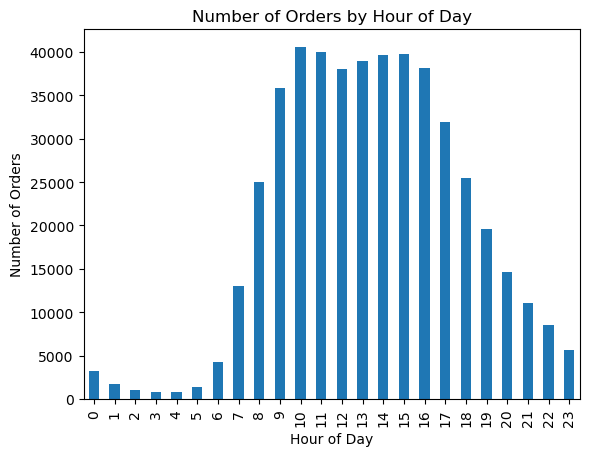

In [44]:
# Count the number of orders placed at each hour of the day
orders_per_hour = orders['order_hour_of_day'].value_counts().sort_index()

# Rename the columns for clarity
orders_per_hour.columns = ['order_hour_of_day', 'orders_per_hour']

# Create a bar chart showing how many orders are placed at each hour of the day
orders_per_hour.plot(x='order_hour_of_day',
                   y='orders_per_hour',
                   kind='bar',
                     title='Number of Orders by Hour of Day',
                     xlabel='Hour of Day',
                     ylabel='Number of Orders',
                     legend=False)
plt.show()

#### Observation:
- Most grocery orders are placed between 10 AM and 4 PM, with a noticeable peak around 10–11 AM.
- Very few orders are made during early morning hours (midnight to 6 AM).

### [A3] What day of the week do people shop for groceries?

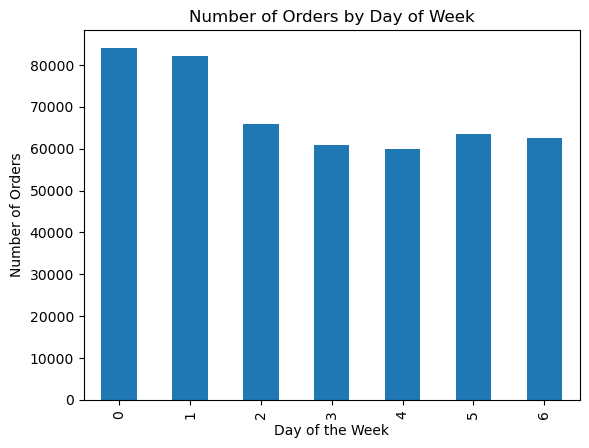

In [45]:
# Count number of orders for each day of the week (0–6)
orders_dow = orders['order_dow'].value_counts().sort_index()

# Plot number of orders by day of week (labels are just 0–6, not actual weekdays)
orders_dow.plot(kind='bar',
                title='Number of Orders by Day of Week',
                xlabel='Day of the Week',
                ylabel='Number of Orders',
                legend=False
               )

plt.show()

#### Observation:

The highest number of orders is placed on days labeled 0 and 1, which likely correspond to weekend days. Order volume drops slightly from day 2 onwards and remains relatively stable throughout the rest of the week. This suggests that users are most active in grocery shopping at the start of the week, possibly over the weekend.

### [A4] How long do people wait until placing another order?

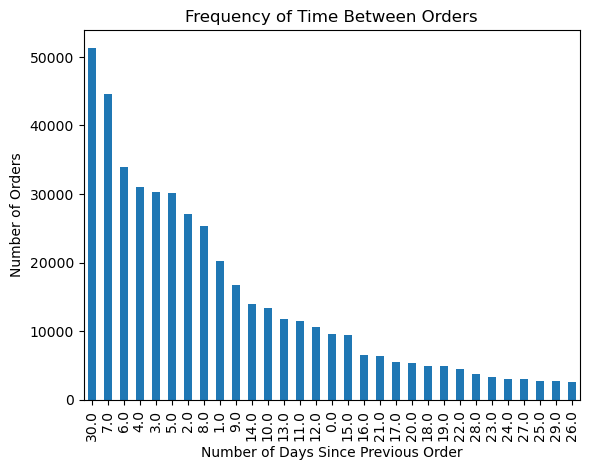

In [46]:
# Count how many orders are placed after a certain number of days since the previous one,
# and sort by descending order to see most common gaps
days_between_orders = orders['days_since_prior_order'].value_counts().sort_values(ascending=False)

# Plot a bar chart showing how many orders are placed after N days since previous one
days_between_orders.plot(kind='bar',
                         title='Frequency of Time Between Orders',
                         xlabel='Number of Days Since Previous Order',
                         ylabel='Number of Orders',
                         legend=False)
plt.show()

#### Observation

Most customers reorder within 30 days, with clear peaks at 7 days (weekly), 30 days (monthly), and every few days (2–6 days). This suggests that shopping behavior is cyclical and often based on weekly or monthly habits.

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

Based on typical shopping patterns and external resources on the Instacart dataset,  
I assume that `0` corresponds to **Saturday** and `1` to **Sunday**.  
This assumption will guide my analysis in the following sections.

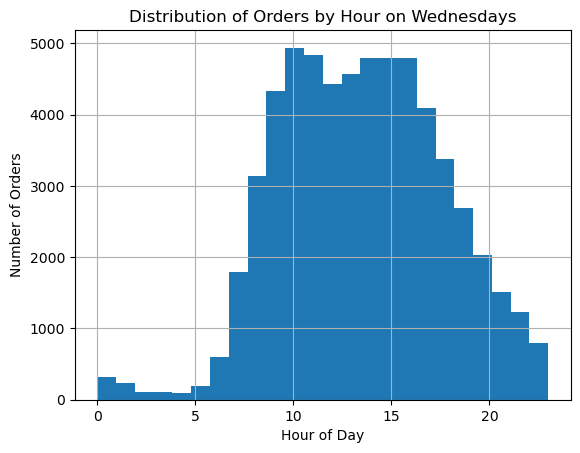

In [47]:
# Filter orders placed on Wednesdays (assuming 4 = Wednesday)
orders_wednesday = orders[orders['order_dow'] == 4]['order_hour_of_day']

# Plot histogram of order times on Wednesdays
orders_wednesday.plot(kind='hist',
                      bins=24,  # one bin per hour
                      title='Distribution of Orders by Hour on Wednesdays',
                      legend=False)

# Add axis labels
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.grid(True)

plt.show()

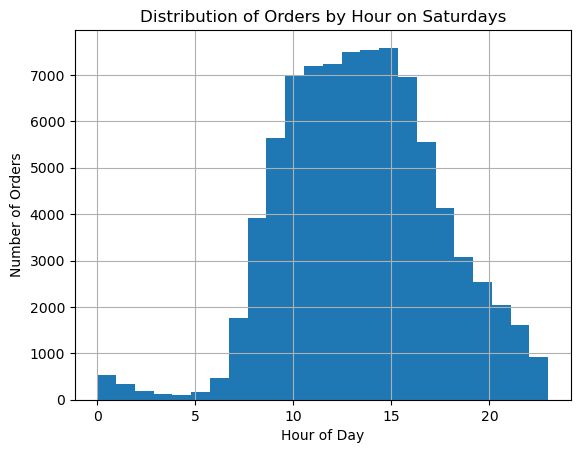

In [48]:
# Filter orders placed on Saturdays (assuming 0 = Saturday)
orders_saturday = orders[orders['order_dow'] == 0]['order_hour_of_day']

# Plot histogram of order times on Saturdays
orders_saturday.plot(kind='hist',
                     bins=24,  # one bin per hour
                     title='Distribution of Orders by Hour on Saturdays',
                     legend=False)

# Add axis labels
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.grid(True)

plt.show()

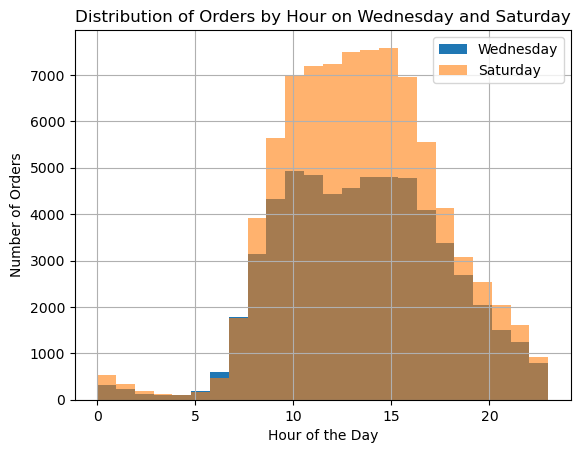

In [49]:
# Plot histogram of order hours on Wednesdays
orders_wednesday.plot(kind='hist',
                      bins=24)

# Plot histogram of order hours on Saturdays with transparency
orders_saturday.plot(kind='hist',
                     bins=24,
                     alpha=0.6)

# Add chart title and axis labels
plt.title('Distribution of Orders by Hour on Wednesday and Saturday')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')

# Add legend to distinguish the days
plt.legend(['Wednesday', 'Saturday'])
plt.grid(True)

plt.show()

#### Observation

- There is a noticeable difference in the distribution of orders by hour on Wednesdays and Saturdays.
- On Wednesdays, the number of orders peaks between 10 AM and 3 PM, with relatively fewer orders during early morning and late evening hours.
- On Saturdays, the distribution is more spread out. There are more orders during the early morning hours (6–9 AM) compared to Wednesdays, and high order activity continues until around 5 PM.
- Overall, Saturdays have more orders throughout the day, especially in the earlier hours, suggesting that users may shop earlier when they are free from weekday obligations.
- This difference indicates a shift in customer shopping behavior on weekends versus weekdays.

### [B2] What's the distribution for the number of orders per customer?

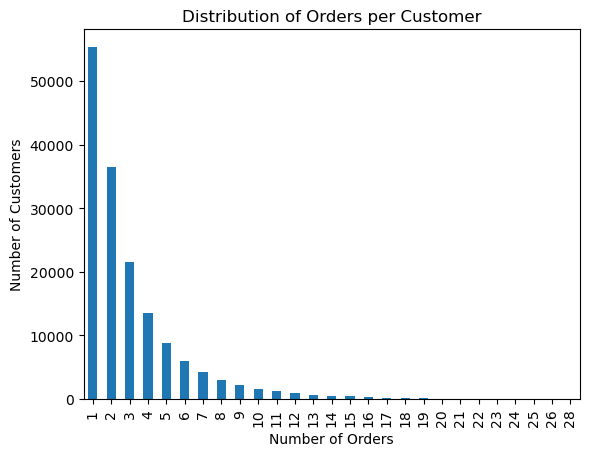

In [50]:
# Count how many orders each customer has placed
orders_per_customer = orders['user_id'].value_counts()

# Count how many customers placed 1 order, 2 orders, etc.
distribution = orders_per_customer.value_counts().sort_index()

# Plot the distribution as a bar chart
distribution.plot(kind='bar',
                  title='Distribution of Orders per Customer',
                  xlabel='Number of Orders',
                  ylabel='Number of Customers')

plt.show()

#### Observation

- Most customers placed only a few orders — with the highest count of customers placing exactly 1 or 2 orders.
- As the number of orders increases, the number of customers decreases sharply.
- This suggests that while many customers try the service once or twice, a smaller group becomes repeat or loyal users.

### [B3] What are the top 20 popular products (display their id and name)?

In [51]:
# Count how many times each product was ordered and get the top 20
top_products = order_products['product_id'].value_counts().head(20)

# Reset the index to convert the Series into a DataFrame
top_products = top_products.reset_index()

# Rename the columns for clarity
top_products.columns = ['product_id', 'order_count']

# Merge with the products DataFrame to get product names
top_products = top_products.merge(products[['product_id', 'product_name']], on='product_id', how='left')

print(top_products)

    product_id  order_count              product_name
0        24852        66050                    Banana
1        13176        53297    Bag of Organic Bananas
2        21137        37039      Organic Strawberries
3        21903        33971      Organic Baby Spinach
4        47209        29773      Organic Hass Avocado
5        47766        24689           Organic Avocado
6        47626        21495               Large Lemon
7        16797        20018              Strawberries
8        26209        19690                     Limes
9        27845        19600        Organic Whole Milk
10       27966        19197       Organic Raspberries
11       22935        15898      Organic Yellow Onion
12       24964        15292            Organic Garlic
13       45007        14584          Organic Zucchini
14       39275        13879       Organic Blueberries
15       49683        13675            Cucumber Kirby
16       28204        12544        Organic Fuji Apple
17        5876        12232 

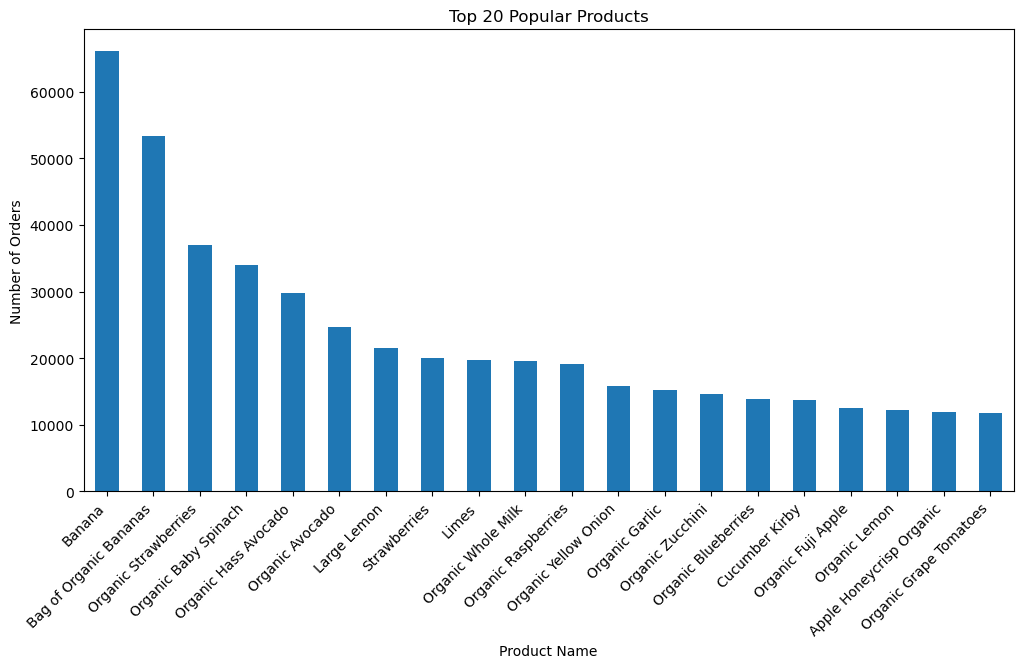

In [52]:
# Plot a bar chart of the top 20 most popular products

top_products.plot(x='product_name',
                  y='order_count',
                  kind='bar',
                  xlabel='Product Name',
                  ylabel='Number of Orders',
                  figsize=(12, 6),
                  legend=False,
                  title='Top 20 Popular Products'
                 )

plt.xticks(rotation=45, ha='right')
plt.show()

#### Observation:

- Banana is by far the most frequently purchased product, followed by Bag of Organic Bananas and Organic Strawberries. Bananas appear in approximately every 7th order on average.
- The top 20 products are dominated by organic fruits and vegetables, suggesting a strong customer preference for healthy and organic choices.

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

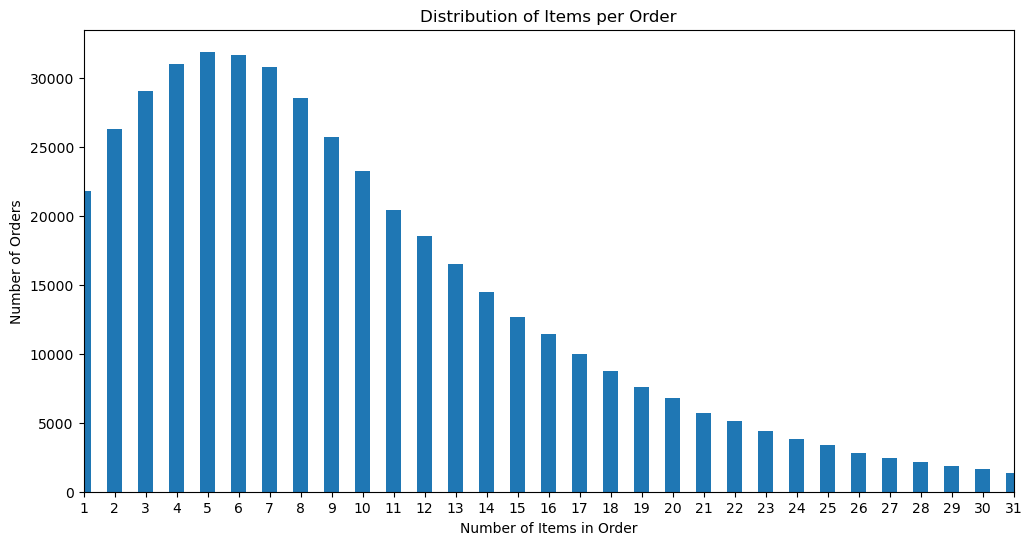

In [53]:
# Count how many items were included in each order
items_per_order = order_products['order_id'].value_counts()

# Count how many orders had the same number of items (e.g., how many orders had 5 items, 6 items, etc.)
distribution = items_per_order.value_counts().sort_index()

# Plot the distribution as a bar chart
distribution.plot(kind='bar',
                  title='Distribution of Items per Order',
                  xlabel='Number of Items in Order',
                  ylabel='Number of Orders',
                  figsize=(12, 6) 
                 )

# Limit the x-axis to 0–30 to make the plot more readable
plt.xlim(0, 30)

# Rotate x-axis labels to horizontal
plt.xticks(rotation=0)

plt.show()

#### Observation:

- The most common order size is **5–7 items**, with 6 being the mode (the most frequent value).
- Most orders contain between **3 and 10 items**, showing a strong central tendency.
- As the number of items increases beyond 10, the number of such orders decreases significantly.
- Very large orders (more than 20 items) are rare, indicating that customers typically shop for a moderate number of items at once.

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [54]:
# Filter only reordered products
reordered_products = order_products[order_products['reordered'] == 1]

# Count how many times each product was reordered
reorder_counts = reordered_products['product_id'].value_counts().head(20)

# Reset index to turn Series into DataFrame
reorder_counts = reorder_counts.reset_index()

# Rename columns for clarity
reorder_counts.columns = ['product_id', 'reorder_count']

# Merge with product names
top20_reordered = reorder_counts.merge(products[['product_id', 'product_name']], on='product_id', how='left')

print(top20_reordered)

    product_id  reorder_count              product_name
0        24852          55763                    Banana
1        13176          44450    Bag of Organic Bananas
2        21137          28639      Organic Strawberries
3        21903          26233      Organic Baby Spinach
4        47209          23629      Organic Hass Avocado
5        47766          18743           Organic Avocado
6        27845          16251        Organic Whole Milk
7        47626          15044               Large Lemon
8        27966          14748       Organic Raspberries
9        16797          13945              Strawberries
10       26209          13327                     Limes
11       22935          11145      Organic Yellow Onion
12       24964          10411            Organic Garlic
13       45007          10076          Organic Zucchini
14       49683           9538            Cucumber Kirby
15       28204           8989        Organic Fuji Apple
16        8277           8836  Apple Honeycrisp 

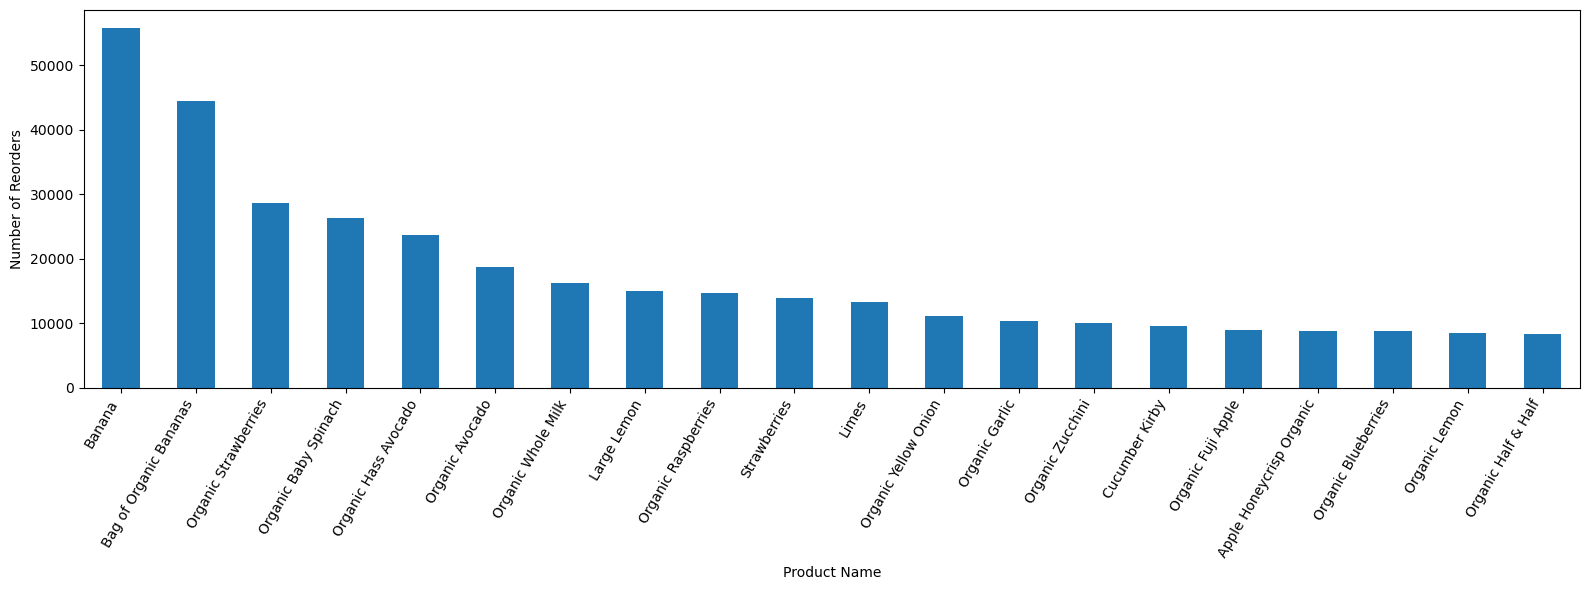

In [55]:
# Create a bar chart of the top 20 reordered products

top20_reordered.plot(
    x='product_name',
    y='reorder_count',
    kind='bar',
    figsize=(16, 6),
    xlabel='Product Name',
    ylabel='Number of Reorders',
    legend=False
)

plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

#### Observation:
- Bananas are the most frequently reordered item by a large margin, followed by Bag of Organic Bananas and Organic Strawberries.
- The majority of top reordered items are organic fruits and vegetables, indicating strong customer loyalty to healthy and organic products.
- Several items in this list (e.g. Organic Avocado, Organic Whole Milk) appeared in previous rankings too, suggesting that popular products are not only bought often but also consistently repurchased.

### [C3] For each product, what proportion of its orders are reorders?

In [56]:
# Calculate the total number of orders for each product
total_orders = order_products.groupby('product_id').size()

# Calculate the number of reorders for each product
reorders = order_products[order_products['reordered'] == 1].groupby('product_id').size()

# Calculate reorder rate (proportion of orders that are reorders)
reorder_rate = (reorders / total_orders).fillna(0)

# Convert Series to DataFrame
reorder_rate = reorder_rate.reset_index()

# Rename columns for clarity
reorder_rate.columns = ['product_id', 'reorder_rate']

# Merge with product names
reorder_rate = reorder_rate.merge(products[['product_id', 'product_name']], on='product_id', how='left')

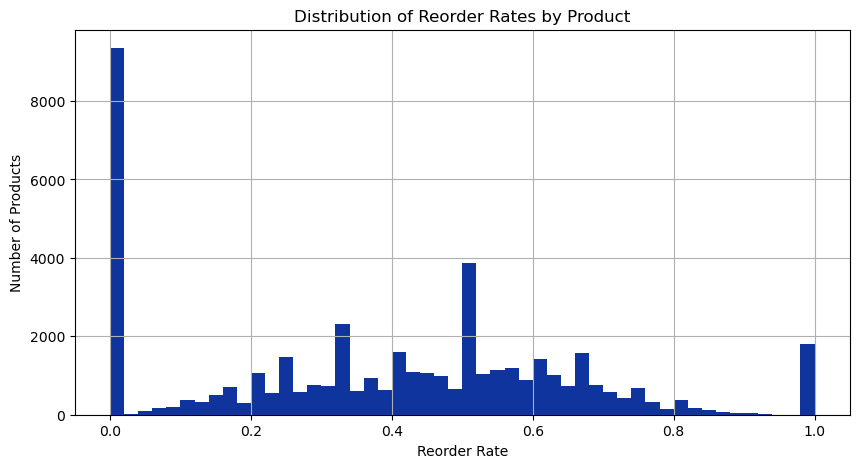

In [57]:
plt.figure(figsize=(10, 5))
plt.hist(reorder_rate['reorder_rate'], bins=50, color='#0F349D')
plt.title('Distribution of Reorder Rates by Product')
plt.xlabel('Reorder Rate')
plt.ylabel('Number of Products')
plt.grid(True)
plt.show()

#### Observation:
- The majority of products have a low reorder rate, meaning they are rarely purchased more than once.
- A significant number of products were never reordered (reorder rate = 0), possibly indicating one-time or trial purchases.
- A small group of products have a reorder rate close to 1, suggesting they are consistently reordered — likely essential or staple items.
- The distribution is right-skewed, with fewer products having high reorder rates, highlighting that only select products drive recurring purchases.



### Conclusion

In this project, I explored customer shopping behavior using data from Instacart. The main objectives were to clean the data, analyze purchase patterns, and identify key trends such as most popular products, order frequency, and reorder behavior.

**Through data cleaning and exploratory analysis, I found that:**

1. Customers most often place orders in the morning and on weekends.
2. A few products are extremely popular and frequently reordered.
3. Many products have a reorder rate close to 0 or 1, which may indicate either one-time purchases or staple items that users buy regularly.

One of the main challenges was dealing with missing values and choosing the right way to handle them without affecting the overall analysis. I also learned to work with multiple tables and join them effectively, which was a great practice for real-life projects.

This project helped me apply key data analysis skills using pandas, such as data cleaning, grouping, filtering, and visualization. The results provide insights into customer behavior, which could be useful for improving recommendation systems or inventory planning.

In the future, it would be interesting to go further and analyze customer segments, predict reorders, or explore seasonal trends in purchases.

